Create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

--> Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

---------------------------------------------------------------------------------------------------------
1. The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

--------------------------------------------------------------------------------------------------------
2. The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

--------------------------------------------------------------------------------------------------------

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

--------------------------------------------------------------------------------------------------------
Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

--------------------------------------------------------------------------------------------------------
As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* Include a written description of THREE observable trends based on the data.
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.


Script
--------------

In [54]:
#Import Dependencies
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import tweepy

In [55]:
#Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, consumer_secret,
                   access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [56]:
# Target Account
target_user = "@BBC"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get tweets
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print the text
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Append sentiments for each tweet from @BBC
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound_BBC": compound,
                           "Positive_BBC": pos,
                           "Negative_BBC": neu,
                           "Neutral_BBC": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
        
BBC =pd.DataFrame.from_dict(sentiments)


print(f"-------------------------------------------------------------------------------------------")
print(f"There are {len(BBC)} tweets and their sentiments from BBC collected here")
print(f"-------------------------------------------------------------------------------------------")

BBC.head()

Tweet 1: 🐢 Scientists have found new evidence confirming that turtles once lived without shells.
👉 https://t.co/xLIFJNJdh1 https://t.co/VUcP8zguW7
Tweet 2: A conversation with a homeless man inspired Stephen to attempt the unusual challenge of crossing the Alps on a spac… https://t.co/w6h0Yhe5bf
Tweet 3: 😂 If Britney's songs were Scottish. https://t.co/Em0LRQmbFt
Tweet 4: RT @BBCOne: Be careful who you trust.

#Bodyguard. Continues Sundays at 9pm on @BBCOne. Or available to watch on @BBCiPlayer: https://t.co/…
Tweet 5: RT @BBCiPlayer: Watch the highlights from Reading and Leeds Festivals on BBC iPlayer 🙌 
https://t.co/AfQl9nXavO https://t.co/KGbRUouFCZ
Tweet 6: Once upon a time, two early humans of different ancestry met at a cave in Russia.

50,000 years later, scientists h… https://t.co/oOCBlGLFqQ
Tweet 7: @BBCTravelShow is on @BBCiPlayer now 👉 https://t.co/Sqn5y0xC80
Tweet 8: 🍅 Neighbourhood gardens are providing important access to fresh food in urban areas. https://t.co/wLol6vY5rW

Tweet 81: 🐢 Scientists have found new evidence confirming that turtles once lived without shells.
👉 https://t.co/xLIFJNJdh1 https://t.co/VUcP8zguW7
Tweet 82: A conversation with a homeless man inspired Stephen to attempt the unusual challenge of crossing the Alps on a spac… https://t.co/w6h0Yhe5bf
Tweet 83: 😂 If Britney's songs were Scottish. https://t.co/Em0LRQmbFt
Tweet 84: RT @BBCOne: Be careful who you trust.

#Bodyguard. Continues Sundays at 9pm on @BBCOne. Or available to watch on @BBCiPlayer: https://t.co/…
Tweet 85: RT @BBCiPlayer: Watch the highlights from Reading and Leeds Festivals on BBC iPlayer 🙌 
https://t.co/AfQl9nXavO https://t.co/KGbRUouFCZ
Tweet 86: Once upon a time, two early humans of different ancestry met at a cave in Russia.

50,000 years later, scientists h… https://t.co/oOCBlGLFqQ
Tweet 87: @BBCTravelShow is on @BBCiPlayer now 👉 https://t.co/Sqn5y0xC80
Tweet 88: 🍅 Neighbourhood gardens are providing important access to fresh food in urban areas. https://t.co/wL

,Compound_BBC,Date,Negative_BBC,Neutral_BBC,Positive_BBC,Tweets Ago
0,0.0000,Tue Aug 28 18:56:05 +0000 2018,1.000,0.0,0.000,1
1,0.5423,Tue Aug 28 18:03:04 +0000 2018,0.780,0.0,0.220,2
2,0.0000,Tue Aug 28 16:01:02 +0000 2018,1.000,0.0,0.000,3
3,0.5994,Tue Aug 28 14:51:38 +0000 2018,0.795,0.0,0.205,4
4,0.3612,Tue Aug 28 14:51:32 +0000 2018,0.848,0.0,0.152,5


In [57]:
# Target Account
target_user = "@CBS"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get tweets
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print the text
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Append sentiments for each tweet from @BBC
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound_CBS": compound,
                           "Positive_CBS": pos,
                           "Negative_CBS": neu,
                           "Neutral_CBS": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
        
CBS =pd.DataFrame.from_dict(sentiments)


print(f"-------------------------------------------------------------------------------------------")
print(f"There are {len(CBS)} tweets and their sentiments from CBS collected here")
print(f"-------------------------------------------------------------------------------------------")

CBS.head()

Tweet 1: It's almost time for sweater weather, pumpkin spice lattes, and CBS Fall TV premieres. Check out the storylines for… https://t.co/BpgDyYl8fc
Tweet 2: RT @cbsallaccess: #NFL preseason coverage is here! 🏈 The Detroit @Lions battle the Tampa Bay @Buccaneers tonight at 8PM ET. Stream the game…
Tweet 3: @bigbangtheory 🎶...happy kitty, sleepy kitty, purr purr purr🎶 #TheBigBangTheory https://t.co/sEObppGJlZ
Tweet 4: This is going to require multiple singings of "Soft Kitty." https://t.co/UdRGNeQ7Lb
Tweet 5: Got to get more of the @PaulMcCartney #CarpoolKaraoke into your life? @latelateshow produced an hour-long bonus spe… https://t.co/DjPqajo6Xn
Tweet 6: How much does it cost to bury the truth? 
#OneDollar premieres August 30, exclusively on CBS All Access. https://t.co/ZL5TBH9ro5
Tweet 7: Things got carried away when @ArianaGrande joined @latelateshow for #CarpoolKaraoke. So did Ariana. #ArianaCarpool https://t.co/WSZcC0TaYz
Tweet 8: RT @cbsallaccess: Murder mystery set in a small t

Tweet 61: It's almost time for sweater weather, pumpkin spice lattes, and CBS Fall TV premieres. Check out the storylines for… https://t.co/BpgDyYl8fc
Tweet 62: RT @cbsallaccess: #NFL preseason coverage is here! 🏈 The Detroit @Lions battle the Tampa Bay @Buccaneers tonight at 8PM ET. Stream the game…
Tweet 63: @bigbangtheory 🎶...happy kitty, sleepy kitty, purr purr purr🎶 #TheBigBangTheory https://t.co/sEObppGJlZ
Tweet 64: This is going to require multiple singings of "Soft Kitty." https://t.co/UdRGNeQ7Lb
Tweet 65: Got to get more of the @PaulMcCartney #CarpoolKaraoke into your life? @latelateshow produced an hour-long bonus spe… https://t.co/DjPqajo6Xn
Tweet 66: How much does it cost to bury the truth? 
#OneDollar premieres August 30, exclusively on CBS All Access. https://t.co/ZL5TBH9ro5
Tweet 67: Things got carried away when @ArianaGrande joined @latelateshow for #CarpoolKaraoke. So did Ariana. #ArianaCarpool https://t.co/WSZcC0TaYz
Tweet 68: RT @cbsallaccess: Murder mystery set in a

,Compound_CBS,Date,Negative_CBS,Neutral_CBS,Positive_CBS,Tweets Ago
0,0.0000,Mon Aug 27 23:36:57 +0000 2018,1.000,0.000,0.000,1
1,-0.4389,Fri Aug 24 20:30:16 +0000 2018,0.879,0.121,0.000,2
2,0.0000,Wed Aug 22 20:55:25 +0000 2018,1.000,0.000,0.000,3
3,0.0000,Wed Aug 22 20:10:12 +0000 2018,1.000,0.000,0.000,4
4,0.5423,Mon Aug 20 21:59:56 +0000 2018,0.829,0.000,0.171,5


In [58]:
# Target Account
target_user = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get tweets
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print the text
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Append sentiments for each tweet from @BBC
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound_CNN": compound,
                           "Positive_CNN": pos,
                           "Negative_CNN": neu,
                           "Neutral_CNN": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
        
CNN =pd.DataFrame.from_dict(sentiments)


print(f"-------------------------------------------------------------------------------------------")
print(f"There are {len(CNN)} tweets and their sentiments from CNN collected here")
print(f"-------------------------------------------------------------------------------------------")

CNN.head()

Tweet 1: Rep. Ron DeSantis will win Florida's Republican governor's primary, CNN projects, in yet another win for a Trump-ba… https://t.co/5pJqz1Y3ro
Tweet 2: The former CEO of Barnes &amp; Noble is suing the bookseller over his firing last month https://t.co/9saAEwKexu https://t.co/50mk7FweBe
Tweet 3: RT @OutFrontCNN: Sen. Mark Warner says his former Senate colleague John McCain told him 'to stick at it and get to the truth' in the Russia…
Tweet 4: A tale of two refugee girls | By Angelina Jolie via @CNNOpinion https://t.co/T8IV5Hq92F https://t.co/Kf3mnGf0UO
Tweet 5: Former Papa John's chairman John Schnatter says he believes he's being scapegoated for the pizza chain's poor perfo… https://t.co/CzYxf5brI5
Tweet 6: RT @OutFrontCNN: "Never, ever has any president come even close to saying if my side loses there's going to be violence. I think it is irre…
Tweet 7: Air pollution could be more damaging to our health than previously thought, according to a new study, which found t… https://

Tweet 61: Rep. Ron DeSantis will win Florida's Republican governor's primary, CNN projects, in yet another win for a Trump-ba… https://t.co/5pJqz1Y3ro
Tweet 62: The former CEO of Barnes &amp; Noble is suing the bookseller over his firing last month https://t.co/9saAEwKexu https://t.co/50mk7FweBe
Tweet 63: RT @OutFrontCNN: Sen. Mark Warner says his former Senate colleague John McCain told him 'to stick at it and get to the truth' in the Russia…
Tweet 64: A tale of two refugee girls | By Angelina Jolie via @CNNOpinion https://t.co/T8IV5Hq92F https://t.co/Kf3mnGf0UO
Tweet 65: Former Papa John's chairman John Schnatter says he believes he's being scapegoated for the pizza chain's poor perfo… https://t.co/CzYxf5brI5
Tweet 66: RT @OutFrontCNN: "Never, ever has any president come even close to saying if my side loses there's going to be violence. I think it is irre…
Tweet 67: Air pollution could be more damaging to our health than previously thought, according to a new study, which found t… h

,Compound_CNN,Date,Negative_CNN,Neutral_CNN,Positive_CNN,Tweets Ago
0,0.8225,Wed Aug 29 00:14:50 +0000 2018,0.678,0.000,0.322,1
1,-0.1280,Wed Aug 29 00:11:04 +0000 2018,0.667,0.200,0.133,2
2,0.3182,Wed Aug 29 00:04:35 +0000 2018,0.916,0.000,0.084,3
3,0.0000,Wed Aug 29 00:01:05 +0000 2018,1.000,0.000,0.000,4
4,-0.4767,Tue Aug 28 23:51:03 +0000 2018,0.853,0.147,0.000,5


In [59]:
# Target Account
target_user = "@FoxNews"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get tweets
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print the text
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Append sentiments for each tweet from @BBC
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound_FOX": compound,
                           "Positive_FOX": pos,
                           "Negative_FOX": neu,
                           "Neutral_FOX": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
        
FOX =pd.DataFrame.from_dict(sentiments)


print(f"-------------------------------------------------------------------------------------------")
print(f"There are {len(FOX)} tweets and their sentiments from FOX collected here")
print(f"-------------------------------------------------------------------------------------------")

FOX.head()

Tweet 1: Mom punches homeless woman to stop alleged kidnapping of daughter: records https://t.co/kTA7By9E9g
Tweet 2: BREAKING: Trump-backed Florida Rep. DeSantis wins GOP primary race for Florida governor, Fox News projects. https://t.co/1Tn4dpNToH
Tweet 3: Missouri becomes first state to issue law protecting citizens from accidentally buying fake meat. https://t.co/qtM6tGsgLm
Tweet 4: MS-13 gang member arrested after he re-entered US illegally, Border Patrol says. https://t.co/JfudMBr3Hp
Tweet 5: .@MZHemingway on NC redistricting ruling: "It throws the entire state into chaos and it disenfranchises an entire s… https://t.co/MclIbutDdK
Tweet 6: Brett Kavanaugh backed by Bob Bennett, Bill Clinton's Paula Jones-era lawyer. (via @nicoledarrah) https://t.co/ifUt1PuDVh
Tweet 7: Toddler's death after leaving immigration facility leads to $40 million legal claim. https://t.co/H2dXw2vJuI
Tweet 8: .@USCG and @USNavy bomb technicians are working to retrieve what looks like an unexploded mine tha

Tweet 81: Mom punches homeless woman to stop alleged kidnapping of daughter: records https://t.co/kTA7By9E9g
Tweet 82: BREAKING: Trump-backed Florida Rep. DeSantis wins GOP primary race for Florida governor, Fox News projects. https://t.co/1Tn4dpNToH
Tweet 83: Missouri becomes first state to issue law protecting citizens from accidentally buying fake meat. https://t.co/qtM6tGsgLm
Tweet 84: MS-13 gang member arrested after he re-entered US illegally, Border Patrol says. https://t.co/JfudMBr3Hp
Tweet 85: .@MZHemingway on NC redistricting ruling: "It throws the entire state into chaos and it disenfranchises an entire s… https://t.co/MclIbutDdK
Tweet 86: Brett Kavanaugh backed by Bob Bennett, Bill Clinton's Paula Jones-era lawyer. (via @nicoledarrah) https://t.co/ifUt1PuDVh
Tweet 87: Toddler's death after leaving immigration facility leads to $40 million legal claim. https://t.co/H2dXw2vJuI
Tweet 88: .@USCG and @USNavy bomb technicians are working to retrieve what looks like an unexploded 

,Compound_FOX,Date,Negative_FOX,Neutral_FOX,Positive_FOX,Tweets Ago
0,-0.2960,Wed Aug 29 00:14:14 +0000 2018,0.833,0.167,0.000,1
1,0.5719,Wed Aug 29 00:03:50 +0000 2018,0.802,0.000,0.198,2
2,-0.6705,Tue Aug 28 23:58:35 +0000 2018,0.703,0.297,0.000,3
3,-0.4767,Tue Aug 28 23:44:42 +0000 2018,0.795,0.205,0.000,4
4,-0.5719,Tue Aug 28 23:38:00 +0000 2018,0.829,0.171,0.000,5


In [60]:
# Target Account
target_user = "@nytimes"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get tweets
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print the text
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Append sentiments for each tweet from @BBC
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound_NYT": compound,
                           "Positive_NYT": pos,
                           "Negative_NYT": neu,
                           "Neutral_NYT": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
        
NYT =pd.DataFrame.from_dict(sentiments)


print(f"-------------------------------------------------------------------------------------------")
print(f"There are {len(NYT)} tweets and their sentiments from NYT collected here")
print(f"-------------------------------------------------------------------------------------------")

NYT.head()

Tweet 1: Ron DeSantis, a once-little known conservative congressman, vaulted to victory in the Florida governor’s primary on… https://t.co/5gbb2oSxLl
Tweet 2: Florida primary election live results
https://t.co/vZKTxiT9he
Tweet 3: “She had a smile on her face. She looked at peace.” Long lines of fans remember Aretha Franklin at a public viewing… https://t.co/GWSSFzwIx5
Tweet 4: RT @joshbarone: Three male principal dancers are out at New York City Ballet: 
- Chase Finlay resigned
- Zachary Catazaro and Amar Ramasar…
Tweet 5: Peter Polansky may be tennis’s luckiest loser. The Canadian player lost his way into the main draw of all of the Gr… https://t.co/ScUpCNy0sl
Tweet 6: RT @shearm: Also, @realDonaldTrump noted that Pastor Jeffress said Trump is not "the perfect human being, but he’s the greatest leader for…
Tweet 7: RT @shearm: UPDATED SCOOP: I’ve added a bit more to my story about @realDonaldTrump remarks to evangelicals after getting more audio. POTUS…
Tweet 8: First election results

Tweet 81: Ron DeSantis, a once-little known conservative congressman, vaulted to victory in the Florida governor’s primary on… https://t.co/5gbb2oSxLl
Tweet 82: Florida primary election live results
https://t.co/vZKTxiT9he
Tweet 83: “She had a smile on her face. She looked at peace.” Long lines of fans remember Aretha Franklin at a public viewing… https://t.co/GWSSFzwIx5
Tweet 84: RT @joshbarone: Three male principal dancers are out at New York City Ballet: 
- Chase Finlay resigned
- Zachary Catazaro and Amar Ramasar…
Tweet 85: Peter Polansky may be tennis’s luckiest loser. The Canadian player lost his way into the main draw of all of the Gr… https://t.co/ScUpCNy0sl
Tweet 86: RT @shearm: Also, @realDonaldTrump noted that Pastor Jeffress said Trump is not "the perfect human being, but he’s the greatest leader for…
Tweet 87: RT @shearm: UPDATED SCOOP: I’ve added a bit more to my story about @realDonaldTrump remarks to evangelicals after getting more audio. POTUS…
Tweet 88: First election

,Compound_NYT,Date,Negative_NYT,Neutral_NYT,Positive_NYT,Tweets Ago
0,0.0000,Wed Aug 29 00:11:02 +0000 2018,1.000,0.000,0.000,1
1,0.0000,Wed Aug 29 00:02:04 +0000 2018,1.000,0.000,0.000,2
2,0.3612,Tue Aug 28 23:51:02 +0000 2018,0.889,0.000,0.111,3
3,-0.2500,Tue Aug 28 23:41:02 +0000 2018,0.909,0.091,0.000,4
4,-0.2023,Tue Aug 28 23:32:06 +0000 2018,0.676,0.193,0.132,5


A scatter plot of the sentiments
-------------------------------------

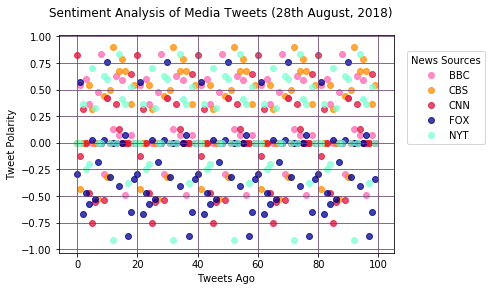

<Figure size 432x288 with 0 Axes>

In [61]:
#Plot the News Compounds collected above

BBC_comp = BBC['Compound_BBC']
CBS_comp = CBS['Compound_CBS']
CNN_comp = CNN['Compound_CNN']
FOX_comp = FOX['Compound_FOX']
NYT_comp = NYT['Compound_NYT']

#Set Colors
color_scheme = {'hotpink':'#FF69B4', 'darkorange':'#FF8C00', 'crimson':'#DC143C', 'darkblue':'#00008B', 'aquamarine':'#7FFFD4'}
newscolors = {'BBC': color_scheme['hotpink'], 'CBS': color_scheme['darkorange'], 'CNN': color_scheme['crimson'], 'FOX': color_scheme['darkblue'], 'NYT': color_scheme['aquamarine']} 

#Scatter Plots
bbc_scatter = plt.scatter(np.arange(len(BBC_comp)), BBC_comp, marker = 'o', color = newscolors['BBC'] , label = 'BBC', alpha = .75)
cbs_scatter = plt.scatter(np.arange(len(CBS_comp)), CBS_comp, marker = 'o', color = newscolors['CBS'] , label = 'CBS', alpha = .75)
cnn_scatter = plt.scatter(np.arange(len(CNN_comp)), CNN_comp, marker = 'o', color = newscolors['CNN'] , label = 'CNN', alpha = .75)
fox_scatter = plt.scatter(np.arange(len(FOX_comp)), FOX_comp, marker = 'o', color = newscolors['FOX'] , label = 'FOX', alpha = .75)
nyt_scatter = plt.scatter(np.arange(len(NYT_comp)), NYT_comp, marker = 'o', color = newscolors['NYT'] , label = 'NYT', alpha = .75)

#Create Grid
plt.grid(True, color = '#694670')

#Label
plt.legend(handles=[bbc_scatter, cbs_scatter, cnn_scatter, fox_scatter, nyt_scatter], loc=(1.04,.5), title = 'News Sources')
plt.suptitle('Sentiment Analysis of Media Tweets (28th August, 2018)')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')

#Plot
plt.show()

#Save as png
plt.savefig("Sentiment_Analysis.png")

Bar plot visualizing the overall sentiments 
--------------------------------------------------

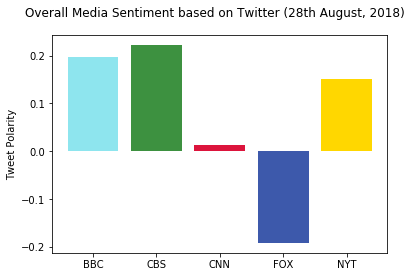

<Figure size 432x288 with 0 Axes>

In [63]:
#Average each media compound
BBC_avg = BBC_comp.mean()
CBS_avg = CBS_comp.mean()
CNN_avg = CNN_comp.mean()
FOX_avg = FOX_comp.mean()
NYT_avg = NYT_comp.mean()

#x-axis and media values
news_avg = [BBC_avg, CBS_avg, CNN_avg, FOX_avg, NYT_avg]
x_axis = np.arange(len(news_avg))

#media colors
hexcodes = ['#8EE5EE', '#3D9140', '#DC143C', '#3D59AB', '#FFD700']

#change the values to media handles
tick_loactions = [value for value in x_axis]
plt.xticks(tick_loactions, ['BBC', 'CBS', 'CNN', 'FOX', 'NYT'])

#create bar chart
plt.bar(x_axis, news_avg, color = hexcodes)

#title and y axis label
plt.suptitle('Overall Media Sentiment based on Twitter (28th August, 2018)')
plt.ylabel('Tweet Polarity')

#plot bar chart
plt.show()

#Save as png
plt.savefig("Overall_Media_Sentiment.png")

Three Observations (These keep changing. Everytime I am running the code CNN and FOX are changing in the bar plot above). 
------------------------------------------
1. BBC, CBS, CNN & NYT tweets are positive in nature.
2. FOX news tweets are negative in sentiments. 
3. Among the positive tweets, CBS has the highest score, while CNN has the least positive score.